In [3]:
from google.colab import files
uploaded = files.upload()
!unzip -q student-mental-health.zip

import pandas as pd
df = pd.read_csv("Student Mental health.csv")
df.head()

Saving student-mental-health.zip to student-mental-health (2).zip
replace Student Mental health.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

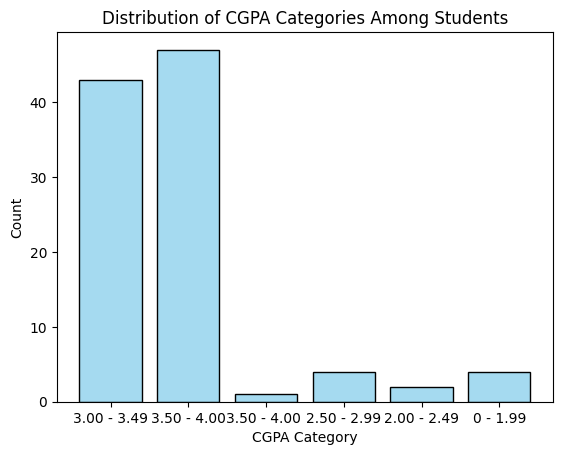

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of CGPA categories
sns.histplot(data=df, x='What is your CGPA?', color='skyblue', shrink=0.8)

# Add a title and labels for better readability
plt.title('Distribution of CGPA Categories Among Students')
plt.xlabel('CGPA Category')
plt.ylabel('Count')

# Show the plot
plt.show()

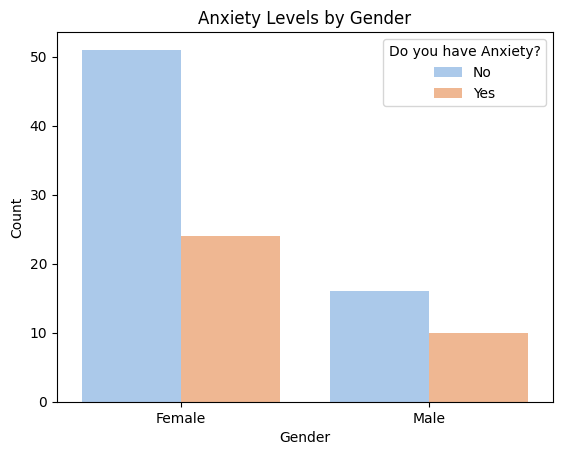

In [8]:
# Create a bar plot to compare anxiety levels across genders
sns.countplot(data=df, x='Choose your gender', hue='Do you have Anxiety?', palette='pastel')

# Add a title and labels
plt.title('Anxiety Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

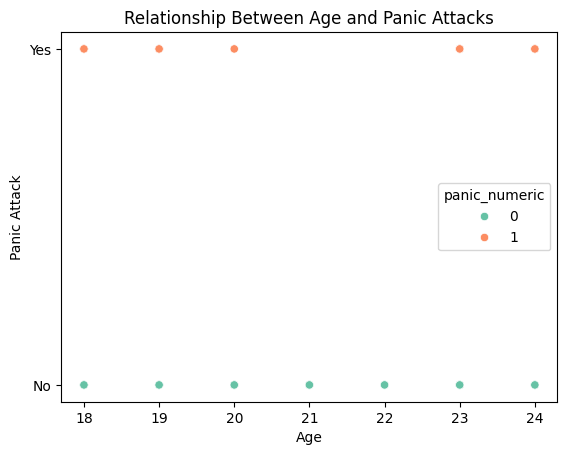

In [9]:
# Convert panic attack responses to numeric values (Yes=1, No=0)
df['panic_numeric'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

# Create scatter plot with age on x-axis and panic attack presence on y-axis
sns.scatterplot(data=df, x='Age', y='panic_numeric', hue='panic_numeric', palette='Set2')

# Customize y-axis ticks for clarity
plt.yticks([0, 1], ['No', 'Yes'])

# Add title and axis labels
plt.title('Relationship Between Age and Panic Attacks')
plt.xlabel('Age')
plt.ylabel('Panic Attack')

# Display the plot
plt.show()

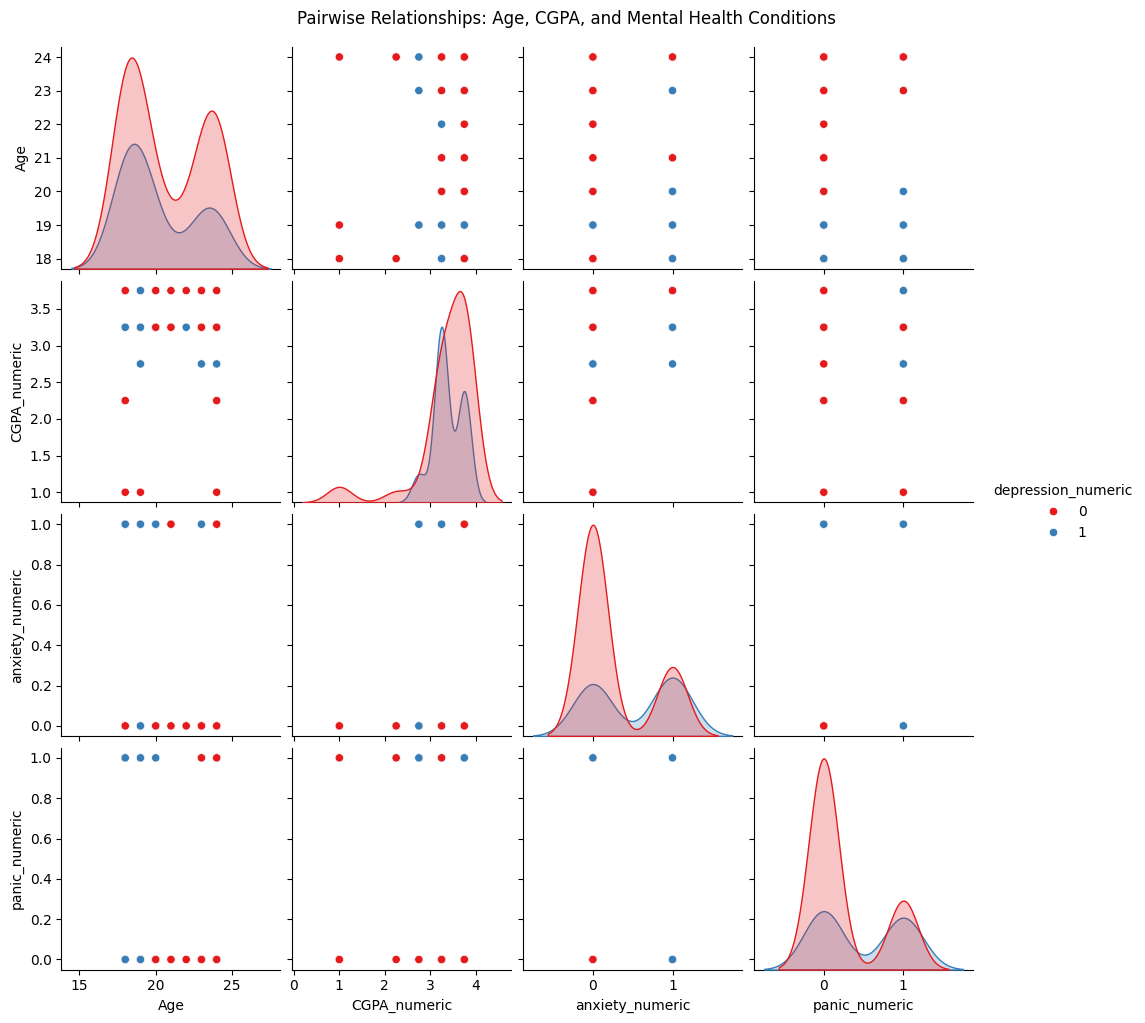

In [12]:
# Convert CGPA categories to numeric values (midpoint of each range)
df['CGPA_numeric'] = df['What is your CGPA?'].map({
    '0 - 1.99': 1.0,
    '2.00 - 2.49': 2.25,
    '2.50 - 2.99': 2.75,
    '3.00 - 3.49': 3.25,
    '3.50 - 4.00': 3.75
})

# Convert Yes/No responses to binary numeric values
df['depression_numeric'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})
df['anxiety_numeric'] = df['Do you have Anxiety?'].map({'Yes': 1, 'No': 0})
df['panic_numeric'] = df['Do you have Panic attack?'].map({'Yes': 1, 'No': 0})

# Select relevant columns for pairplot and drop missing values
plot_df = df[['Age', 'CGPA_numeric', 'depression_numeric', 'anxiety_numeric', 'panic_numeric']].dropna()

# Create pairplot to show pairwise relationships, using depression as hue
sns.pairplot(plot_df, hue='depression_numeric', palette='Set1', diag_kind='kde')

# Add a title to the figure
plt.suptitle('Pairwise Relationships: Age, CGPA, and Mental Health Conditions', y=1.02)

# Display the plot
plt.show()

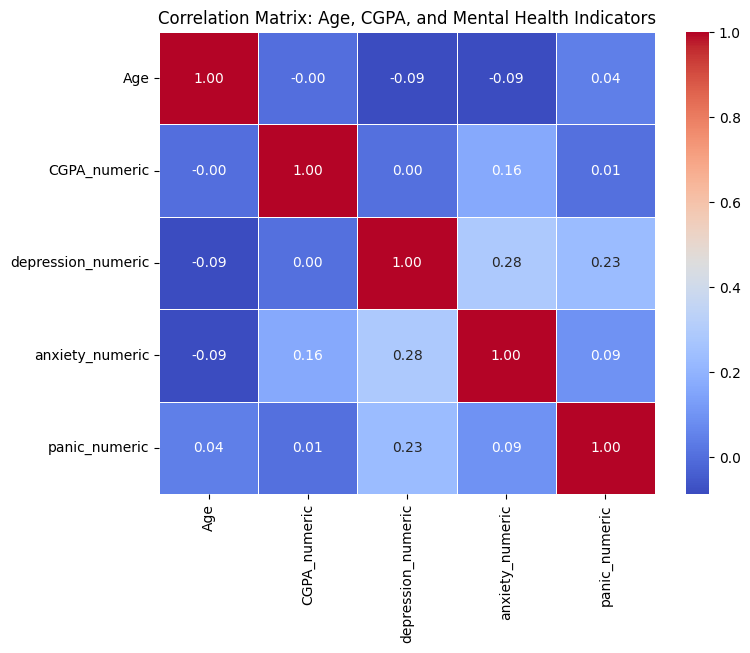

In [13]:
# Select relevant columns for correlation analysis
corr_df = df[['Age', 'CGPA_numeric', 'depression_numeric', 'anxiety_numeric', 'panic_numeric']].dropna()

# Calculate correlation matrix
corr_matrix = corr_df.corr()

# Create heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix: Age, CGPA, and Mental Health Indicators')

# Show the plot
plt.show()

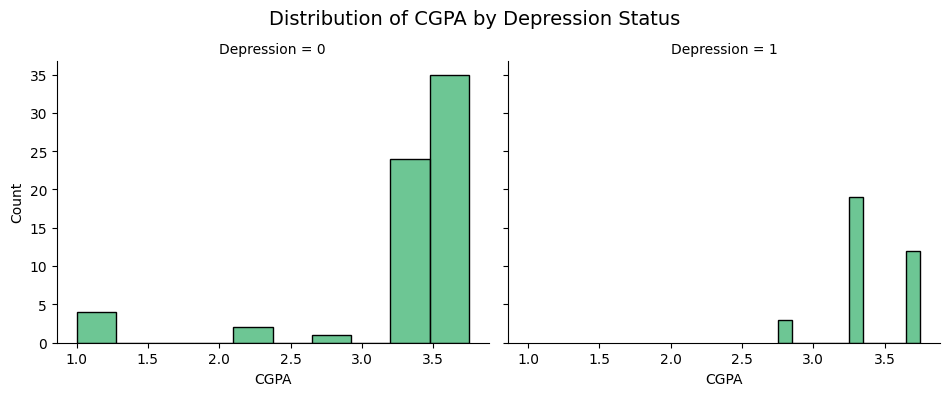

In [14]:
# Create a FacetGrid to separate histograms by depression status
g = sns.FacetGrid(df, col='depression_numeric', height=4, aspect=1.2)

# Map histogram of CGPA to each facet
g.map_dataframe(sns.histplot, x='CGPA_numeric', bins=10, color='mediumseagreen')

# Add titles and axis labels
g.set_titles(col_template='Depression = {col_name}')
g.set_axis_labels('CGPA', 'Count')
g.fig.suptitle('Distribution of CGPA by Depression Status', fontsize=14)
g.fig.subplots_adjust(top=0.85)  # Adjust layout to make space for the title

# Show the plot
plt.show()